<i>Data from November 2021</i>

Importing necessary libs and loading data

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
sns.set_style('darkgrid')
colors = sns.color_palette('muted')

In [68]:
df = pd.read_csv('../../datasets/disney_plus.csv')

----
<h4>Data cleaning</h4>

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [70]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('NA')
df = df.dropna(axis=0).reset_index(drop=True)

In [71]:
df['date_added'] = pd.to_datetime(df['date_added'])

----
<h3>EDA</h3>

In [72]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Soo, firstly, maybe let's answer these basic questions:
<ul>
    <li>What's the tv show/film distribution?</li>
    <li>What are the top directors and actors by amount of shows/films made?</li>
    <li>What year have the highest number of releases?</li>
    <li>What's the rating distribution?</li>
</ul>

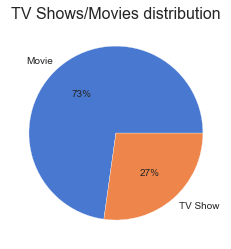

In [73]:
# show/film distribution

sf_dist = df['type'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(sf_dist, labels=['Movie', 'TV Show'], colors=colors, autopct='%.0f%%')
plt.title('TV Shows/Movies distribution', fontsize=16)
plt.savefig('vis/show_film_dist.png')
plt.show()

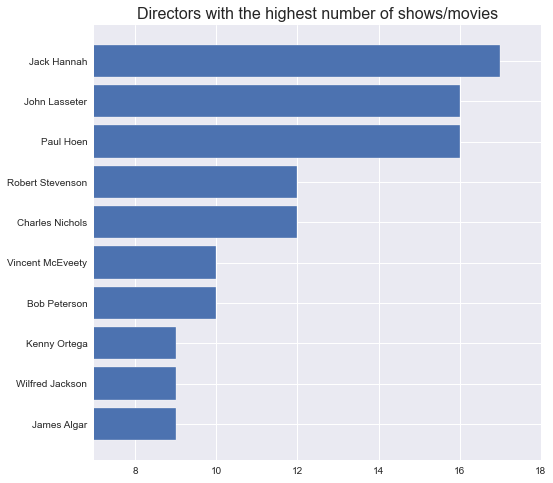

In [74]:
# top directors

directors = df['director'].value_counts()[1:11]
directors = directors.iloc[::-1] # reversing the series

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.barh(directors.index, directors.values)
plt.title('Directors with the highest number of shows/movies', fontsize=16)
plt.xlim([7,18])
plt.savefig('vis/top_directors.png', bbox_inches='tight')
plt.show()

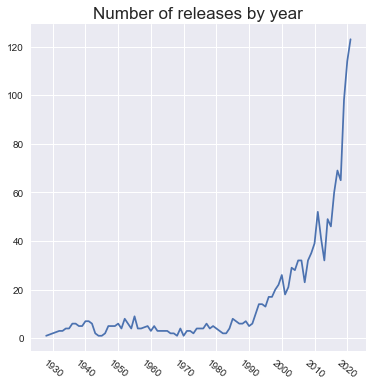

In [75]:
# realease years

rl_years = df['release_year'].value_counts()

plt.figure(figsize=(6,6))
sns.lineplot(x=rl_years.index, y=rl_years.values, data=rl_years)
plt.title('Number of releases by year',fontsize=17)
plt.xticks(np.arange(1930, 2022, 10), rotation=320)
plt.savefig('vis/release_years.png')
plt.show()

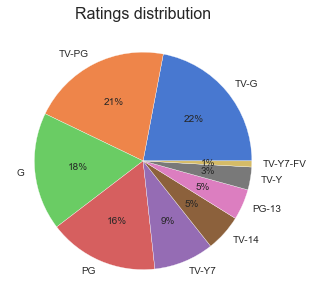

In [76]:
# rating distribution

ratings_dist = df['rating'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(ratings_dist, labels=['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-Y', 'TV-Y7-FV'], colors=colors, autopct='%.0f%%')
plt.title('Ratings distribution', fontsize=16)
plt.savefig('vis/ratings_dist.png')
plt.show()

Here are the answers:
<ul>
    <li>73% of content is a movie; only 23% is a tv show</li>
    <li>Director who did the most movies/shows is <b>Jack Hannah</b></li>
    <li>Year with the most releases is <i>unsurprisingly</i> <b>2021</b></li>
    <li>The most common rating is <b>TV-G (all ages admitted)</b></li>
</ul>

We looked at directors, but now let's check the cast

In [77]:
# function that creates a dictionary by counting how many times unique words repeat in a specified column
def get_unique(data, col):
    output = {}
    for x in data[col]:
        keys = x.split(',')
        for y in keys:
            y = y.strip()
            if y not in output:
                output[y] = 1
            else:
                output[y] += 1
    return output

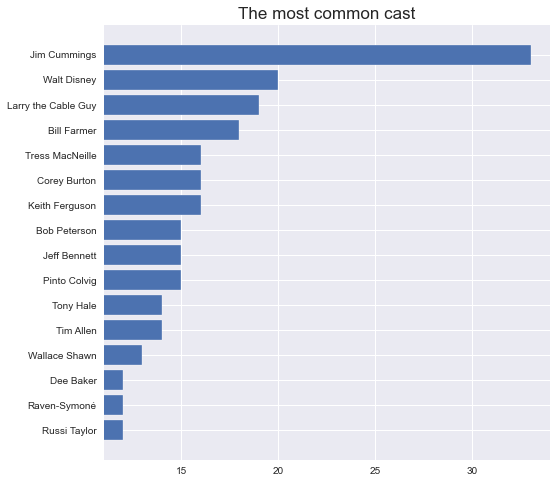

In [78]:
actors = get_unique(df, 'cast')

cast = pd.DataFrame(actors.items(), columns=['Name', 'Count'])
cast = cast.sort_values(by='Count', ascending=False)
cast = cast[1:17]
cast = cast.iloc[::-1]

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.barh(cast['Name'], cast['Count'])
plt.title('The most common cast', fontsize=17)
plt.xlim([11,34])
plt.savefig('vis/top_cast.png', bbox_inches='tight')
plt.show()

So the most common actor on Disney+ is <b>Jim Cummings</b>. I think it's worth mentioning that he is only a voice actor, thus it kinda makes sense.
Also interesting is that <b>Walt Disney</b> is on the second place, but he is also a voice actor.

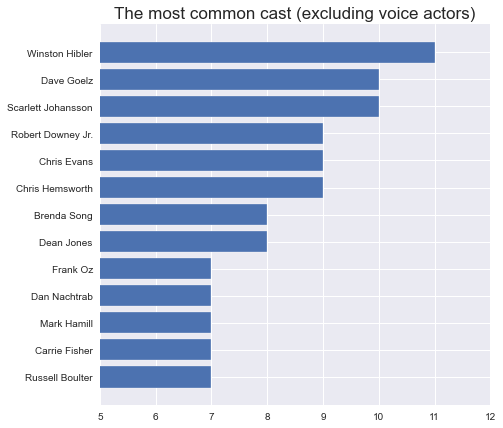

In [79]:
df_without_animations = df[df['listed_in'].str.contains('Animation') == False]

actors_wa = get_unique(df_without_animations, 'cast')

cast_wa = pd.DataFrame(actors_wa.items(), columns=['Name', 'Count'])
cast_wa = cast_wa.sort_values(by='Count', ascending=False)
cast_wa = cast_wa[1:14]
cast_wa = cast_wa.iloc[::-1]

plt.figure(figsize=(7,7))
plt.style.use('seaborn')
plt.barh(cast_wa['Name'], cast_wa['Count'])
plt.title('The most common cast (excluding voice actors)', fontsize=17)
plt.xlim([5,12])
plt.savefig('vis/top_cast_wa.png', bbox_inches='tight')
plt.show()


Well, so excluding voice actors top 2 places are kinda curious. <br><b>Winston Hibler</b> was a director and it seems like he might been playing in his movies<br><b>David Goelz</b> on the other hand is the lead Muppet performer, so yeah, technically it isn't voice acting, right?<br>Other actors/actresses on this list are expected, aren't they? I mean <b>Scarlett Johansson</b>, <b>Robert Downey Jr.</b>... really obvious

Now, let's explore shows/movies duration

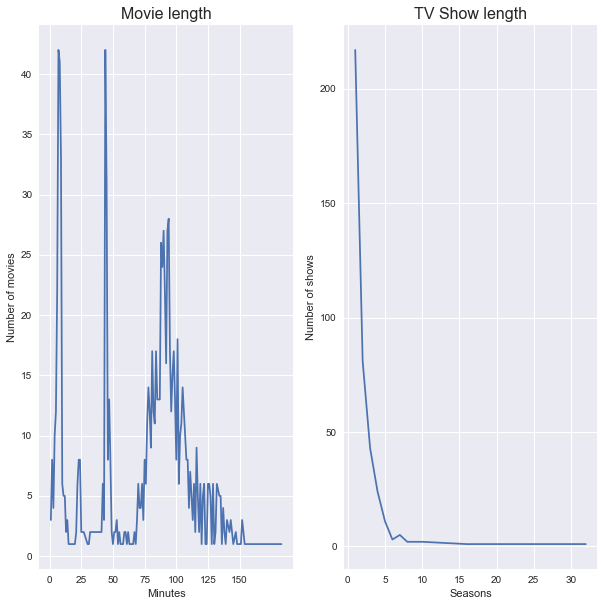

In [80]:
movies_durations = df[['type', 'duration']]
movies_durations = movies_durations[movies_durations.type == 'Movie']
movies_durations = movies_durations['duration'].value_counts().to_frame()
movies_durations = movies_durations.reset_index()
movies_durations = movies_durations.rename(columns={'index': 'duration', 'duration': 'Count'})
movies_durations['duration'] = movies_durations['duration'].apply(lambda x: int(x.split(' ')[0]))
movies_durations = movies_durations.sort_values(by='duration', ascending=True)

shows_durations = df[['type', 'duration']]
shows_durations = shows_durations[shows_durations.type == 'TV Show']
shows_durations = shows_durations['duration'].value_counts().to_frame()
shows_durations = shows_durations.reset_index()
shows_durations = shows_durations.rename(columns={'index': 'duration', 'duration': 'Count'})
shows_durations['duration'] = shows_durations['duration'].apply(lambda x: int(x.split(' ')[0]))
shows_durations = shows_durations.sort_values(by='duration', ascending=True)

fig, axs = plt.subplots(ncols=2, figsize=(10, 10))
sns.lineplot(data=movies_durations, x='duration', y='Count', ax=axs[0])
sns.lineplot(data=shows_durations, x='duration', y='Count', ax=axs[1])
axs[0].set_title('Movie length', fontsize=16)
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Number of movies')
axs[0].set_yticks(np.arange(0, 45, 5))
axs[0].set_xticks(np.arange(0, 175, 25))
axs[1].set_title('TV Show length', fontsize=16)
axs[1].set_xlabel('Seasons')
axs[1].set_ylabel('Number of shows')
plt.savefig('vis/ms_durations.png')
plt.show()

In [81]:
extremes = df[['title', 'duration']]
extremes['d_check'] = extremes['duration'].apply(lambda x: True if x in ['1 min', '180 min', '182 min', '183 min', '16 Seasons', '19 Seasons', '32 Seasons'] else False)
extremes[extremes['d_check'] == True]

<ipython-input-81-a2e015ccbdb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extremes['d_check'] = extremes['duration'].apply(lambda x: True if x in ['1 min', '180 min', '182 min', '183 min', '16 Seasons', '19 Seasons', '32 Seasons'] else False)


,title,duration,d_check
14,Baymax!,1 min,True
26,Obi-Wan Kenobi,1 min,True
36,The Proud Family: Louder and Prouder,1 min,True
91,The Simpsons,32 Seasons,True
105,Life Below Zero,16 Seasons,True
114,The Incredible Dr. Pol,19 Seasons,True
327,Arendelle Castle Yule Log,180 min,True
330,Dory's Reef Cam,182 min,True
1036,Marvel Studios' Avengers: Endgame,183 min,True


Seems like short movies/shows are only a teaser for upcoming releases<br>
But we can definitely say that the longest movie on disney+ is <b>Marvel Studios' Avengers: Endgame</b><br>
And the longest tv show is <b>The Simpsons</b>

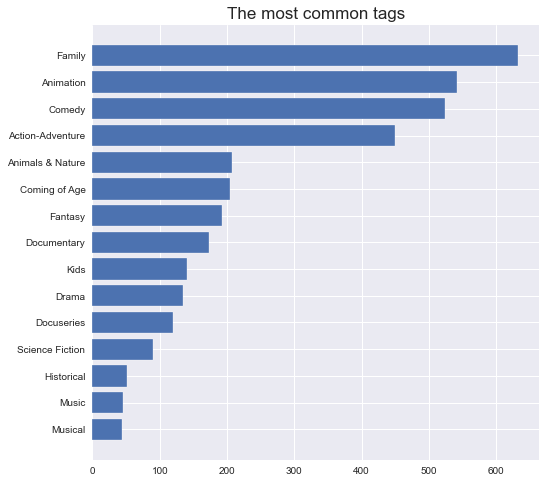

In [83]:
# The most common tags

tags = get_unique(df, 'listed_in')

tags_df = pd.DataFrame(tags.items(), columns=['Name', 'Count'])
tags_df = tags_df.sort_values(by='Count', ascending=False)
tags_df = tags_df[:15]
tags_df = tags_df.iloc[::-1]

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.barh(tags_df['Name'], tags_df['Count'])
plt.title('The most common tags', fontsize=17)
#plt.xlim([11,34])
plt.savefig('vis/top_tags.png', bbox_inches='tight')
plt.show()

The most common tags are:
<ul>
    <li><b>Family</b></li>
    <li><b>Animation</b></li>
    <li><b>Comedy</b></li>
    <li><b>Action-Adventure</b></li>
</ul>
<br>No surprises for me. I mean, disney associates with family friendly content.

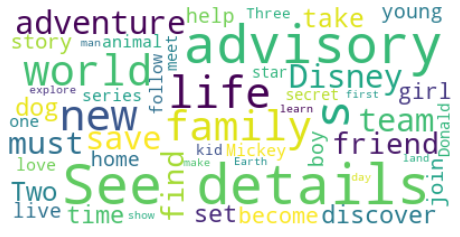

In [84]:
# description wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud

text = ' '.join(word for word in df.description)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color='white').generate(text)
wordcloud.to_file('vis/description_wc.png')
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

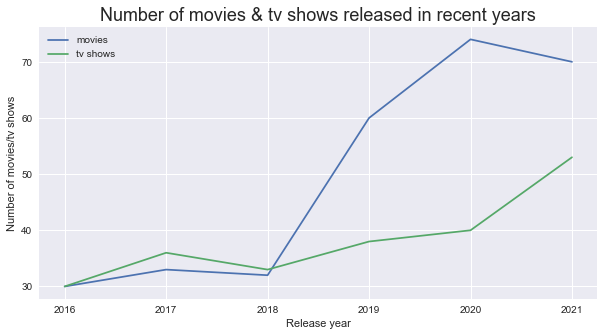

In [85]:
# tv shows/movies recent years releases comparison

rl_years_comp = df[['release_year', 'type']]
rl_years_comp = rl_years_comp[rl_years_comp['release_year'] >= 2016]
recent_rl_shows = rl_years_comp[rl_years_comp['type'] == 'TV Show']
recent_rl_shows = recent_rl_shows['release_year'].value_counts().reset_index().sort_values('index', ascending=True)
recent_rl_movies = rl_years_comp[rl_years_comp['type'] == 'Movie']
recent_rl_movies = recent_rl_movies['release_year'].value_counts().reset_index().sort_values('index', ascending=True)

plt.figure(figsize=(10,5))
sns.lineplot(data=recent_rl_movies, x='index', y='release_year', label='movies')
sns.lineplot(data=recent_rl_shows, x='index', y='release_year', label='tv shows')
plt.title('Number of movies & tv shows released in recent years', fontsize=18)
plt.xlabel('Release year')
plt.ylabel('Number of movies/tv shows')
plt.savefig('vis/recent_releases_comparison.png')
plt.show()

As you can see, Disney+ was more focused on releasing movies in recent year, but there is an intereting insight. Last year, number of released movies slightly fell whereas amount of tv shows noticeably increased. So, maybe now the trend will reverse